In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header=None)

In [4]:
df

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
X=df.iloc[:,:-1]
X

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
Y=df.iloc[:,-1]
Y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: 4, Length: 150, dtype: object

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)

In [8]:
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier()

In [9]:
dc.fit(X_train,Y_train)

DecisionTreeClassifier()

In [10]:
dc.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [11]:
y_predict=dc.predict(X_test)

In [12]:
#performance
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_predict))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.81      0.90        16
 Iris-virginica       0.81      1.00      0.90        13

       accuracy                           0.93        45
      macro avg       0.94      0.94      0.93        45
   weighted avg       0.95      0.93      0.93        45



In [13]:
#validation
from sklearn.model_selection import cross_val_score
print(cross_val_score(dc,X_train,Y_train,cv=5))
print(cross_val_score(dc,X_test,Y_test,cv=5))

[0.95238095 0.9047619  1.         0.95238095 1.        ]
[0.88888889 1.         1.         0.88888889 1.        ]


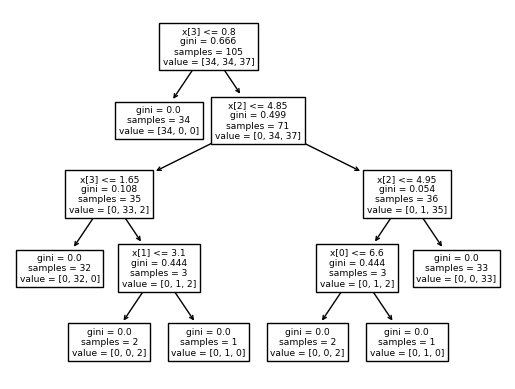

In [14]:
from sklearn import tree
tree.plot_tree(dc)
plt.show()

In [ ]:
#POST PRUNING
#CCP ALPHA

In [15]:
path=dc.cost_complexity_pruning_path(X_train,Y_train)

In [16]:
path

{'ccp_alphas': array([0.        , 0.00925926, 0.01269841, 0.02321995, 0.28305473,
        0.32863083]),
 'impurities': array([0.        , 0.01851852, 0.03121693, 0.05443689, 0.33749162,
        0.66612245])}

In [17]:
ccp_a=path.ccp_alphas
ccp_a

array([0.        , 0.00925926, 0.01269841, 0.02321995, 0.28305473,
       0.32863083])

In [19]:
imp=path.impurities
imp

array([0.        , 0.01851852, 0.03121693, 0.05443689, 0.33749162,
       0.66612245])

In [20]:
clfs=[]
for i in ccp_a:
    dc=DecisionTreeClassifier(ccp_alpha=i)
    dc.fit(X_train,Y_train)
    clfs.append(dc)

In [23]:
clfs

[DecisionTreeClassifier(),
 DecisionTreeClassifier(ccp_alpha=0.009259259259259262),
 DecisionTreeClassifier(ccp_alpha=0.012698412698412698),
 DecisionTreeClassifier(ccp_alpha=0.023219954648526064),
 DecisionTreeClassifier(ccp_alpha=0.28305473049939844),
 DecisionTreeClassifier(ccp_alpha=0.32863083261473597)]

In [24]:
print('the number of nodes present  in last tree',clfs[-1].tree_.node_count)
print(ccp_a[-1])

the number of nodes present  in last tree 1
0.32863083261473597


In [25]:
train_acc=[]
test_acc=[]
for i in clfs:
    train_acc.append(i.score(X_train,Y_train))
for i in clfs:
    test_acc.append(i.score(X_test,Y_test))

In [26]:
train_acc

[1.0,
 0.9904761904761905,
 0.9809523809523809,
 0.9714285714285714,
 0.6761904761904762,
 0.3523809523809524]

In [27]:
test_acc

[0.9111111111111111,
 0.9333333333333333,
 0.9333333333333333,
 0.9111111111111111,
 0.6444444444444445,
 0.28888888888888886]

In [28]:
ccp_a

array([0.        , 0.00925926, 0.01269841, 0.02321995, 0.28305473,
       0.32863083])

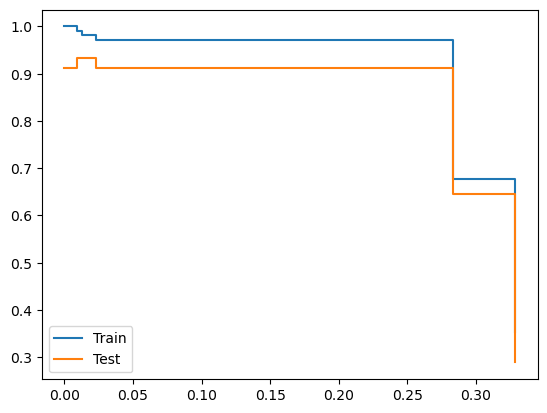

In [33]:
fig,ax=plt.subplots()
ax.plot(ccp_a,train_acc,drawstyle='steps-post',label='Train')
ax.plot(ccp_a,test_acc,drawstyle='steps-post',label='Test')
plt.legend()
plt.show()

In [35]:
dc=DecisionTreeClassifier(ccp_alpha=0.01269841)
dc

DecisionTreeClassifier(ccp_alpha=0.01269841)

In [36]:
dc.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.01269841)

In [37]:
Y_p=dc.predict(X_test)

In [38]:
print(classification_report(Y_test,Y_p))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.81      0.90        16
 Iris-virginica       0.81      1.00      0.90        13

       accuracy                           0.93        45
      macro avg       0.94      0.94      0.93        45
   weighted avg       0.95      0.93      0.93        45



[Text(0.4, 0.9, 'x[3] <= 0.8\ngini = 0.666\nsamples = 105\nvalue = [34, 34, 37]'),
 Text(0.2, 0.7, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(0.6, 0.7, 'x[2] <= 4.85\ngini = 0.499\nsamples = 71\nvalue = [0, 34, 37]'),
 Text(0.4, 0.5, 'x[3] <= 1.65\ngini = 0.108\nsamples = 35\nvalue = [0, 33, 2]'),
 Text(0.2, 0.3, 'gini = 0.0\nsamples = 32\nvalue = [0, 32, 0]'),
 Text(0.6, 0.3, 'x[1] <= 3.1\ngini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.4, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.8, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.8, 0.5, 'gini = 0.054\nsamples = 36\nvalue = [0, 1, 35]')]

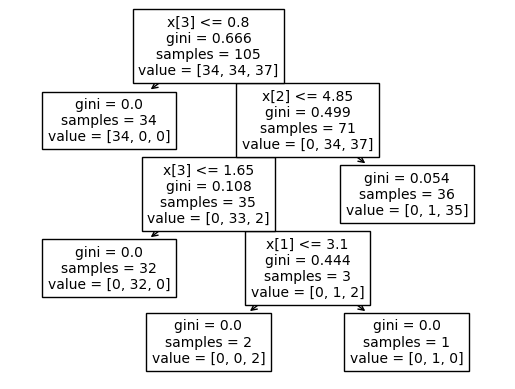

In [39]:
tree.plot_tree(dc)